In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
#Exploração inicial dos dados

#Categoricos:
groupAparencia = dataset.groupby(['Aparencia']).size()
groupAparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [6]:
groupVento = dataset.groupby(['Vento']).size()
groupVento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [8]:
groupJogar = dataset.groupby(['Jogar']).size()
groupJogar

Jogar
nao    5
sim    9
dtype: int64

In [12]:
#Numéricos

#Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

<Axes: >

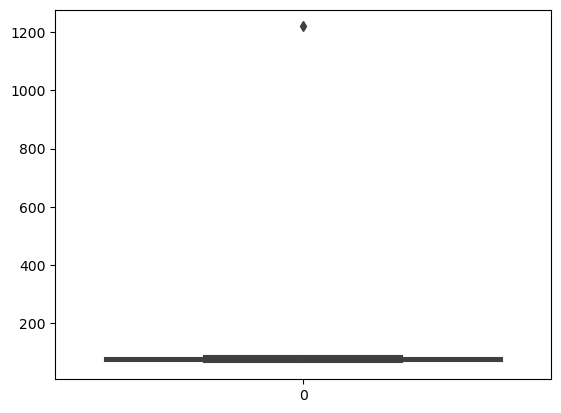

In [13]:
srn.boxplot(dataset['Temperatura'])

In [10]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

<Axes: >

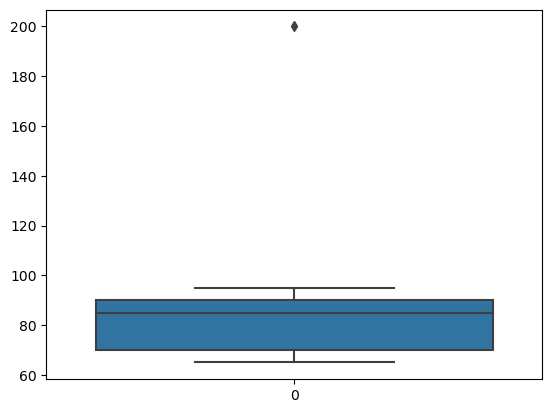

In [14]:
srn.boxplot(dataset['Umidade'])

In [15]:
#Verificando se há valores NAN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [18]:
#Iniciando a correção dos dados
#Removendo NANs

#Umidade
median = sts.median(dataset['Umidade'])
median

85.25

In [19]:
dataset['Umidade'].fillna(median, inplace = True)

#verificando
dataset['Umidade'].isnull().sum()

0

In [20]:
#Vento
#Como visto anteriormente pelo groupby, a moda do Vento é FALSO, usaremos esse valor para substituir o NAN

dataset['Vento'].fillna('FALSO', inplace = True)

#verificando
dataset['Vento'].isnull().sum()

0

In [22]:
#Removendo o valor 'menos' na coluna Aparencia e substituindo pela moda
dataset.loc[dataset['Aparencia'].isin(['menos']), 'Aparencia'] = 'chuva'

#Verificando
groupAparencia = dataset.groupby(['Aparencia']).size()
groupAparencia

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [23]:
#Removendo valores fora do limite em temperatura e umidade, substituindo pela mediana

#Temperatura
median = sts.median(dataset['Temperatura'])
median


73.5

In [25]:
dataset.loc[(dataset['Temperatura'] > 130) | (dataset['Temperatura'] < -130), 'Temperatura'] = median
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [27]:
#Umidade
median = sts.median(dataset['Umidade'])
median

85.25

In [28]:
dataset.loc[(dataset['Umidade'] > 100) | (dataset['Umidade'] < 0), 'Umidade'] = median
dataset['Umidade'].describe()

count    14.000000
mean     81.267857
std       9.576847
min      65.000000
25%      71.250000
50%      85.125000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [30]:
#Verificando o estado final do dataset
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,chuva,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim
